In [3]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

'unzip' is not recognized as an internal or external command,
operable program or batch file.


2.IMAGE AUGMENTATION

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
xtrain=train_datagen.flow_from_directory('/content/drive/MyDrive/Flowers-Dataset',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 1 classes.


In [10]:
xtest=test_datagen.flow_from_directory('/content/drive/MyDrive/Flowers-Dataset',
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 1 classes.


3.CREAT MODEL

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

4.ADD LAYERS

In [13]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

5.COMPILE THE MODEL

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.FIT THE MODEL

In [15]:
model.fit_generator(xtrain,steps_per_epoch= len (xtrain),
                    epochs= 10,
                    validation_data=xtest,
                    validation_steps= len (xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
44/44 [==============================] - 1422s 32s/step - loss: 98.6844 - accuracy: 0.1144 - val_loss: 747.6507 - val_accuracy: 0.0000e+00
Epoch 2/10
44/44 [==============================] - 58s 1s/step - loss: 2036.5842 - accuracy: 0.1621 - val_loss: 5594.6885 - val_accuracy: 0.0000e+00
Epoch 3/10
44/44 [==============================] - 58s 1s/step - loss: 24083.2168 - accuracy: 0.2316 - val_loss: 31227.2891 - val_accuracy: 0.0000e+00
Epoch 4/10
44/44 [==============================] - 58s 1s/step - loss: 80326.7266 - accuracy: 0.2548 - val_loss: 101528.6875 - val_accuracy: 0.0000e+00
Epoch 5/10
44/44 [==============================] - 58s 1s/step - loss: 255532.9531 - accuracy: 0.2316 - val_loss: 495500.6875 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 60s 1s/step - loss: 495693.6562 - accuracy: 0.2548 - val_loss: 449880.2812 - val_accuracy: 0.0000e+00
Epoch 7/10
44/44 [==============================] - 58s 1s/step - loss: 653121.3750 - accur

7.SAVE THE MODEL

In [16]:
model.save('flowers.h5')

8.TESTING THE MODEL

Testing 1

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

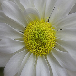

In [20]:
img=image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(76,76))
img

In [31]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['sunflower','dandelion','rose','daisy','tulip']
op[pred]

'daisy'

Testing 2

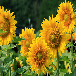

In [29]:
img=image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/sunflower/1008566138_6927679c8a.jpg',target_size=(76,76))
img

In [30]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'sunflower'

Testing 3

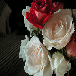

In [34]:
img=image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/rose/102501987_3cdb8e5394_n.jpg',target_size=(76,76))
img

In [36]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','sunflower','rose','tulip']
op[pred]

'rose'